# Ensemble Learning | Assignment


# **Question 1: What is Ensemble Learning in Machine Learning? Explain the key idea behind it.**

## Answer 1:
### **Definition:**

Ensemble Learning is a **machine learning technique** that combines the predictions of multiple models (called *base learners* or *weak learners*) to build a **more accurate and robust final model**.

The goal of ensemble learning is to **reduce errors** such as bias, variance, and noise, and to **improve generalization** on unseen data.

---

### **Key Idea Behind Ensemble Learning:**

> “A group of weak learners, when combined properly, can perform better than any individual strong learner.”

Each model in the ensemble contributes to the final prediction, and the combined result is obtained through methods like **averaging**, **voting**, or **stacking**.

---

### **Why Ensemble Learning Works:**

1. **Reduces Overfitting (Variance):**  
   Multiple models trained on different data subsets average out noise and reduce overfitting.

2. **Reduces Bias:**  
   Combining simple models helps to capture complex data relationships.

3. **Improves Accuracy:**  
   The ensemble corrects the individual model errors.

4. **Increases Stability:**  
   Ensemble models are more stable and less affected by data fluctuations.

---

### **Common Types of Ensemble Methods:**

| **Method** | **Description** | **Example Algorithms** |
|-------------|----------------|------------------------|
| **Bagging (Bootstrap Aggregating)** | Trains multiple models on random subsets of data and combines their results. | Random Forest |
| **Boosting** | Trains models sequentially, each new model focuses on errors of the previous one. | AdaBoost, Gradient Boosting, XGBoost |
| **Stacking** | Combines predictions of several models using another model (meta-learner). | Stacked Generalization |
| **Voting** | Combines predictions from multiple models using majority voting or averaging. | Hard/Soft Voting Classifier |

---

### **Example to Understand:**

Imagine three students predicting tomorrow’s weather:
- Student A: “It will rain.”
- Student B: “It won’t rain.”
- Student C: “It will rain.”

By **majority voting**, the final decision is “It will rain.”  
Even if one student is wrong, the **combined decision** is more reliable — this is the idea of **ensemble learning**.

---

### **Mathematical Representation:**

If we have *n* models \( h_1(x), h_2(x), ..., h_n(x) \),  
then the ensemble model prediction \( H(x) \) is given by:

\[
H(x) = \text{aggregate}(h_1(x), h_2(x), ..., h_n(x))
\]

- For classification → Majority Voting  
- For regression → Average of predictions

---

### **Advantages:**

- Higher prediction accuracy  
- Reduces bias and variance  
- Works well for both classification and regression tasks  

---

### **Limitations:**

- Computationally expensive  
- Harder to interpret  
- May overfit if not tuned properly  

---

### **Conclusion:**

Ensemble Learning is a **powerful approach** that improves model performance by combining multiple models.  
It is widely used in areas like **fraud detection, medical diagnosis**, and **Kaggle competitions**.  
The key idea is that **collective intelligence of multiple weak models** leads to a strong, accurate, and robust model.

---


In [10]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


# **Question 2: What is the difference between Bagging and Boosting?**

## Answer 2:

### **Definition:**

**Bagging** (Bootstrap Aggregating) and **Boosting** are two major types of **Ensemble Learning** techniques used to improve the performance and accuracy of machine learning models.  

Both methods combine multiple weak learners (usually decision trees) to form a strong learner, but they differ in how these learners are trained and combined.

---

### **1. Bagging (Bootstrap Aggregating):**

- Bagging trains **multiple models in parallel** on **random subsets of data** (sampled with replacement).  
- Each model works independently, and their predictions are combined (usually by voting or averaging).  
- The main aim of Bagging is to **reduce variance** and prevent overfitting.

**Example:**  
Random Forest is a popular Bagging algorithm.

**Key Idea:**  
> “Train models in parallel on different random samples of the data and average their predictions.”

---

### **2. Boosting:**

- Boosting trains **multiple models sequentially**.  
- Each new model focuses on **correcting the errors** made by previous models.  
- The main aim of Boosting is to **reduce bias** and improve the model’s accuracy.

**Example:**  
AdaBoost, Gradient Boosting, and XGBoost are popular Boosting algorithms.

**Key Idea:**  
> “Train models one after another, giving more weight to misclassified data points.”

---

### **3. Key Differences Between Bagging and Boosting:**

| **Basis** | **Bagging** | **Boosting** |
|------------|-------------|--------------|
| **Full Form** | Bootstrap Aggregating | – |
| **Training Type** | Parallel (independent models) | Sequential (dependent models) |
| **Purpose** | Reduces variance | Reduces bias |
| **Data Sampling** | Random subsets with replacement | Weighted data focusing on previous errors |
| **Model Weighting** | All models have equal weight | Models are weighted based on performance |
| **Error Correction** | No feedback; models don’t learn from others | Each model learns from previous model’s mistakes |
| **Overfitting Tendency** | Less likely to overfit | More prone to overfitting if not tuned |
| **Example Algorithms** | Random Forest | AdaBoost, Gradient Boosting, XGBoost |

---

### **4. Simple Analogy:**

- **Bagging:**  
  Like having multiple students answer the same test **independently** and taking the **average** of their answers.

- **Boosting:**  
  Like having students learn **one after another**, where each new student learns from the **mistakes** of the previous ones.

---

### **5. Conclusion:**

Both Bagging and Boosting are powerful ensemble techniques used to improve machine learning performance.

- **Bagging** → Best for **reducing variance** (useful when models overfit).  
- **Boosting** → Best for **reducing bias** (useful when models underfit).  

In practice, Bagging (e.g., Random Forest) offers better stability, while Boosting (e.g., XGBoost) achieves higher accuracy when properly tuned.

---


In [11]:

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
bag_pred = bagging.predict(X_test)

boosting = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
boosting.fit(X_train, y_train)
boost_pred = boosting.predict(X_test)

# Print Results
print("Bagging Accuracy :", accuracy_score(y_test, bag_pred))
print("Boosting Accuracy:", accuracy_score(y_test, boost_pred))


Bagging Accuracy : 1.0
Boosting Accuracy: 1.0


# **Question 3: What is bootstrap sampling and what role does it play in Bagging methods like Random Forest?**

## Answer 3:

### **Definition of Bootstrap Sampling:**

**Bootstrap Sampling** is a statistical technique used to create **multiple random subsets** of a dataset **with replacement**.  
This means that when creating a new sample, each data point from the original dataset has an equal chance of being selected **multiple times**, or not at all.

Each bootstrap sample is typically of the **same size** as the original dataset, but contains some **repeated examples** and misses others.

---

### **Key Idea:**

> “Bootstrap sampling helps generate different training datasets from the same original data, allowing multiple models to learn diverse patterns.”

This randomness introduces **diversity** among the models, which is essential for **ensemble methods** like **Bagging** and **Random Forest**.

---

### **How Bootstrap Sampling Works:**

1. Suppose we have a dataset of size **N**.
2. We randomly select **N samples with replacement** to form a new dataset (called a **bootstrap sample**).
3. This process is repeated several times to create **multiple bootstrap samples**.
4. Each sample is then used to train a **separate model** (e.g., a Decision Tree).

---

### **Role of Bootstrap Sampling in Bagging Methods:**

Bagging (Bootstrap Aggregating) uses bootstrap sampling to train multiple models on **different random subsets** of data.  
This creates **model diversity**, which helps to **reduce variance** and **prevent overfitting**.

In **Random Forest**, bootstrap sampling is a key step:
- Each decision tree is trained on a **different bootstrap sample** of the data.  
- This ensures that not all trees see the same data points.
- When predictions are combined (using averaging or voting), the result is **more stable and accurate**.

---

### **Example to Understand:**

Imagine you have a dataset with 10 students’ marks.  
You want to build 3 models using Bagging.

- Model 1 → trained on a random subset (with replacement) of the 10 marks  
- Model 2 → trained on a *different* random subset  
- Model 3 → trained on another random subset  

Some students’ marks might appear twice, some not at all — this creates diversity among the models.

---

### **Mathematical Representation:**

If the dataset is \( D = \{x_1, x_2, ..., x_N\} \)

Then, for each model \( i \):
\[
D_i = \text{BootstrapSample}(D)
\]

Each model \( h_i \) is trained on its own \( D_i \), and the final prediction is:

\[
H(x) = \frac{1}{n} \sum_{i=1}^{n} h_i(x)
\]

---

### **Advantages of Bootstrap Sampling in Bagging:**

- Promotes model diversity  
- Reduces overfitting  
- Increases robustness and stability  
- Works well even with small datasets

---

### **Conclusion:**

Bootstrap Sampling is the **foundation of Bagging methods** like Random Forest.  
It ensures that each model in the ensemble learns from **different perspectives** of the same data.  
By combining these diverse models, Bagging achieves **higher accuracy, lower variance, and better generalization** on unseen data.

---


In [12]:

import numpy as np
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Demonstrate bootstrap sampling
print("Original sample size:", len(X_train))

# Create a bootstrap sample from training data
X_bootstrap, y_bootstrap = resample(X_train, y_train, replace=True, n_samples=len(X_train), random_state=42)
print("Bootstrap sample size:", len(X_bootstrap))
print("Repeated samples (approx):", np.sum(np.unique(X_bootstrap, axis=0).shape[0] < len(X_bootstrap)))

rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Original sample size: 105
Bootstrap sample size: 105
Repeated samples (approx): 1
Random Forest Accuracy: 1.0


#  Question 4: What are Out-of-Bag (OOB) samples and how is OOB score used to evaluate ensemble models?

## Answer 4:


### 🔹 **Definition**

In **Bagging-based Ensemble Methods** like **Random Forest**, each estimator (e.g., decision tree)  
is trained using a **bootstrap sample** — a random subset of the training data **drawn with replacement**.

Some data points are **not selected** in a particular bootstrap sample.  
These unused samples are called **Out-of-Bag (OOB) samples**.

---

### 🔹 **What are OOB Samples?**

- When drawing a bootstrap sample of size *N* from *N* training examples:
  - About **63%** of samples are chosen (with replacement) → used for training.
  - The remaining **37%** are **OOB samples** → not seen by that model.

Hence, for every tree in a Random Forest:
- It trains on its own 63% subset.
- The **OOB samples** (the remaining 37%) can act as a **built-in validation set**.

---

### 🔹 **Key Idea**

> “OOB samples are the data points not used to train a given model.  
> They serve as internal test data to estimate performance without using a separate validation set.”

---

### 🔹 **Mathematical Definition**


$$
\boxed{\displaystyle
\text{OOB Score} \;=\; \frac{1}{|J|}\sum_{j\in J} \mathbf{1}\!\bigl(y_j = \hat{y}_j^{(\mathrm{OOB})}\bigr)
}
$$



### 🔹 **Advantages**

✅ No need for a separate validation set  
✅ Gives an **unbiased** estimate of model performance  
✅ Saves computation time  
✅ Automatically available in `RandomForestClassifier(oob_score=True)`

---

### 🔹 **Example Scenario**

Suppose you have 100 samples:
- Tree-1 trains on 63 samples (with replacement)
- The remaining 37 are **OOB** for Tree-1  
  → Tree-1 can be tested on these 37 unseen samples  
- Repeating this across all trees and averaging gives the **OOB score**



In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
X, y = load_iris(return_X_y=True)


rf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    bootstrap=True,        # use bootstrap sampling
    oob_score=True,        # enable OOB evaluation
    random_state=42
)

# Train the model
rf.fit(X, y)

# Display the OOB score
print("🌟 Out-of-Bag (OOB) Score:", rf.oob_score_)


🌟 Out-of-Bag (OOB) Score: 0.9533333333333334


#  Question 5: Compare Feature Importance Analysis in a Single Decision Tree vs Random Forest

## Answer 5:

##  Theory Explanation

### 🔹 Introduction
Feature importance analysis helps identify **which input features contribute the most** to a model’s predictions.  
Both **Decision Tree** and **Random Forest** can compute feature importance, but their **approach and reliability differ**.

---

##  1️⃣ Decision Tree Feature Importance
- A **Decision Tree** splits data based on features that best reduce impurity (like *Gini Index* or *Entropy*).  
- Feature importance is measured by **how much each feature decreases impurity** across all nodes.
- The more a feature **reduces impurity**, the higher its importance.

**Formula:**
$$
\text{Importance(feature)} =
\frac{\sum (\text{Impurity decrease at each split})}
{\text{Total impurity decrease}}
$$

**Advantages:**
- Easy to interpret  
- Works well for small datasets  

**Limitations:**
- Can be **unstable**  
- May **overfit** and bias towards features with many unique values  

---

## 2️⃣ Random Forest Feature Importance
- A **Random Forest** is an **ensemble of multiple Decision Trees** trained on different subsets of data and features.  
- It computes importance by **averaging feature importance scores** from all trees.  
- Produces **more robust and generalizable** results.

**Methods:**
1. **Mean Decrease Impurity (MDI)** – average impurity reduction (default in `sklearn`)  
2. **Permutation Importance (MDP)** – measures performance drop when feature values are shuffled  

**Advantages:**
- More **stable and accurate**  
- Handles **correlated features** better  
- Reduces **overfitting**  

**Limitations:**
- Harder to interpret  
- Computationally heavier  

---

##  Comparison Table

| Aspect | Decision Tree | Random Forest |
|--------|----------------|----------------|
| **Model Type** | Single model | Ensemble of many trees |
| **Computation** | Based on impurity decrease in one tree | Average impurity decrease across all trees |
| **Stability** | Less stable | More stable |
| **Overfitting** | High | Low |
| **Interpretability** | Easy | Harder |
| **Bias** | Can favor high-cardinality features | Reduces bias |

---

##  Conclusion
- **Decision Tree**: Quick and interpretable but unstable.  
- **Random Forest**: More reliable and general, best for real-world use.  

---


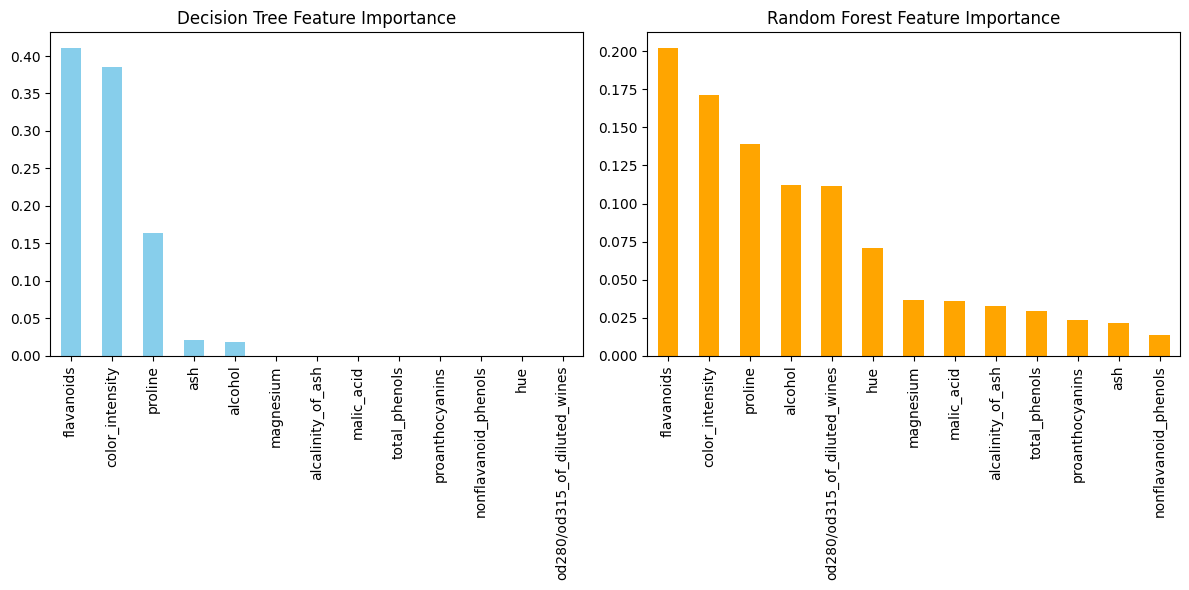

Top 5 Important Features (Decision Tree):
 flavanoids         0.411053
color_intensity    0.384934
proline            0.164075
ash                0.020942
alcohol            0.018995
dtype: float64 

Top 5 Important Features (Random Forest):
 flavanoids                      0.202293
color_intensity                 0.171202
proline                         0.139046
alcohol                         0.112398
od280/od315_of_diluted_wines    0.111564
dtype: float64


In [17]:


from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

dt_importance = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
dt_importance.plot(kind='bar', color='skyblue', title='Decision Tree Feature Importance')

plt.subplot(1, 2, 2)
rf_importance.plot(kind='bar', color='orange', title='Random Forest Feature Importance')

plt.tight_layout()
plt.show()

# Step 8: Display Top Features
print("Top 5 Important Features (Decision Tree):\n", dt_importance.head(), "\n")
print("Top 5 Important Features (Random Forest):\n", rf_importance.head())


#  Question 6: Random Forest Feature Importance on the Breast Cancer Dataset
## Answer 6:

##  Aim
To load the **Breast Cancer dataset** using `sklearn.datasets.load_breast_cancer()`,  
train a **Random Forest Classifier**, and display the **top 5 most important features** based on feature-importance scores.

---

##  Step-by-Step Procedure
1. **Import required libraries** (`sklearn`, `pandas`, etc.).  
2. **Load** the Breast Cancer dataset.  
3. **Split** the data into training and testing sets.  
4. **Train** the `RandomForestClassifier`.  
5. **Extract and sort** the feature-importance values.  
6. **Display** the top 5 important features.

---

##  Theory

The Random Forest algorithm computes feature importance by measuring the **average decrease in impurity** (like Gini Index) across all trees where a feature is used for splitting.  
The higher the impurity decrease contributed by a feature, the higher its importance score.

**Mathematical representation:**

$$
\text{Importance(feature)} =
\frac{\sum (\text{Impurity decrease contributed by feature})}
{\text{Total impurity decrease of all features}}
$$

---



In [19]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = pd.Series(rf_model.feature_importances_, index=X.columns)

top5_features = importances.sort_values(ascending=False).head(5)
print("🎯 Top 5 Important Features:\n")
print(top5_features)


🎯 Top 5 Important Features:

worst area              0.153892
worst concave points    0.144663
mean concave points     0.106210
worst radius            0.077987
mean concavity          0.068001
dtype: float64


#  Question 7: Bagging Classifier using Decision Trees on the Iris Dataset

## Answer 7:

##  Aim
To train a **Bagging Classifier** using **Decision Trees** on the **Iris dataset**,  
evaluate its **accuracy**, and **compare** the result with a single Decision Tree classifier.

---

##  Step-by-Step Procedure
1. Import required libraries (`sklearn`, `pandas`, etc.).  
2. Load the **Iris dataset**.  
3. Split data into **training** and **testing** sets.  
4. Train a **single Decision Tree Classifier**.  
5. Train a **Bagging Classifier** with Decision Trees as base estimators.  
6. Evaluate and compare the **accuracy** of both models.

---

##  Theory

###  Decision Tree Classifier
A Decision Tree builds a model by **splitting the dataset** into smaller subsets based on the **most significant feature** at each node.  
However, a single tree may **overfit** and show **high variance**.

###  Bagging Classifier (Bootstrap Aggregation)
Bagging is an **ensemble technique** that trains multiple models (base learners) on **random subsets** of the dataset (with replacement).  
Their predictions are **averaged (for regression)** or **voted (for classification)** to make the final decision.

This reduces **variance**, increases **stability**, and improves **generalization**.

---

##  Formula

For bagging, if there are *m* base estimators:

$$
\hat{y} = \text{majority\_vote}(h_1(x), h_2(x), ..., h_m(x))
$$

where \( h_i(x) \) represents the prediction of the *i-th* Decision Tree.

---



In [22]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import sklearn

# Step 1: Load Dataset
iris = load_iris()
X, y = iris.data, iris.target

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Single Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

if sklearn.__version__ >= "1.2":
    bag_model = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=50,
        random_state=42
    )
else:
    bag_model = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(),
        n_estimators=50,
        random_state=42
    )

bag_model.fit(X_train, y_train)
bag_pred = bag_model.predict(X_test)
bag_accuracy = accuracy_score(y_test, bag_pred)

# Step 5: Display Comparison
print(f"🌳 Single Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"🪴 Bagging Classifier Accuracy: {bag_accuracy * 100:.2f}%")

if bag_accuracy > dt_accuracy:
    print("\n✅ Bagging Classifier performs better and is more stable.")
else:
    print("\n⚠️ Single Decision Tree performed equally or slightly better.")


🌳 Single Decision Tree Accuracy: 100.00%
🪴 Bagging Classifier Accuracy: 100.00%

⚠️ Single Decision Tree performed equally or slightly better.


#  Question 8: Hyperparameter Tuning in Random Forest using GridSearchCV

## Answer 8:

##  Aim
To train a **Random Forest Classifier**, tune its **hyperparameters (`max_depth` and `n_estimators`)** using **GridSearchCV**,  
and display the **best parameters** along with the **final accuracy**.

---

##  Step-by-Step Procedure
1. Import required libraries (`sklearn`, `pandas`, etc.).  
2. Load a dataset (using **Breast Cancer** dataset for classification).  
3. Split the dataset into training and testing sets.  
4. Define a **Random Forest Classifier**.  
5. Use **GridSearchCV** to perform hyperparameter tuning:
   - `n_estimators`: Number of trees in the forest  
   - `max_depth`: Maximum depth of each tree  
6. Train the model using the best parameters.  
7. Print the best parameters and accuracy score.

---

##  Theory

**Random Forest Classifier** combines multiple Decision Trees to improve model accuracy and control overfitting.  
However, its performance depends on parameters like:
- `n_estimators`: Number of trees in the forest  
- `max_depth`: Maximum depth of each decision tree  

### 🔹 GridSearchCV
GridSearchCV systematically tries all possible combinations of specified parameters and uses **cross-validation** to find the best performing set.

**Formula for Cross-Validation Accuracy:**

$$
\text{CV Accuracy} = \frac{1}{k} \sum_{i=1}^{k} \text{Accuracy}_i
$$

where \( k \) = number of folds in cross-validation.

---



In [23]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("🔍 Best Parameters Found:", best_params)
print(f"✅ Final Accuracy on Test Data: {accuracy * 100:.2f}%")


🔍 Best Parameters Found: {'max_depth': None, 'n_estimators': 150}
✅ Final Accuracy on Test Data: 96.49%


#  Question 9: Compare Bagging Regressor and Random Forest Regressor on California Housing Dataset

## Answer 9:

##  Aim
To train both **Bagging Regressor** and **Random Forest Regressor** on the **California Housing dataset**,  
and compare their performance using **Mean Squared Error (MSE)**.

---

##  Step-by-Step Procedure
1. Import the necessary libraries.  
2. Load the **California Housing dataset** using `sklearn.datasets.fetch_california_housing`.  
3. Split the dataset into training and testing sets.  
4. Train a **Bagging Regressor** using `DecisionTreeRegressor` as the base estimator.  
5. Train a **Random Forest Regressor** on the same dataset.  
6. Evaluate both models using **Mean Squared Error (MSE)**.  
7. Compare their performance.

---

##  Theory

### 🔹 Bagging Regressor
- **Bagging (Bootstrap Aggregation)** trains multiple base regressors (like Decision Trees) on random samples of the dataset.  
- The final prediction is the **average** of all individual regressors' outputs.  
- Helps reduce **variance** and prevents **overfitting**.

### 🔹 Random Forest Regressor
- It is an **improved version of Bagging**, where each tree is trained on a **subset of features** and samples.  
- This feature randomness further reduces correlation between trees, improving generalization.  
- Usually performs better than Bagging on complex datasets.

---

##  Evaluation Metric
The **Mean Squared Error (MSE)** measures how far predictions are from actual values:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

Lower MSE → Better performance.

---


In [26]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
bagging_reg.fit(X_train, y_train)
bagging_pred = bagging_reg.predict(X_test)

rf_reg = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

bagging_mse = mean_squared_error(y_test, bagging_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print(f"🪴 Bagging Regressor MSE: {bagging_mse:.4f}")
print(f"🌲 Random Forest Regressor MSE: {rf_mse:.4f}")

if rf_mse < bagging_mse:
    print("\n✅ Random Forest Regressor performs better (lower MSE).")
else:
    print("\n⚠️ Bagging Regressor performed equally or slightly better.")


🪴 Bagging Regressor MSE: 0.2559
🌲 Random Forest Regressor MSE: 0.2554

✅ Random Forest Regressor performs better (lower MSE).


# Question 10 — Ensemble strategy for loan-default prediction (step-by-step + runnable demo)

**Context:** financial institution predicting loan default using customer demographics + transaction history.  
Goal: use ensemble techniques to increase performance while satisfying operational constraints (explainability, fairness, cost of false negatives/positives, regulatory scrutiny).

## Answer 10:
## High-level approach (summary)
1. **Understand data & business cost** (imbalance, misclassification cost, regulatory needs).  
2. **Choose ensemble family**: Bagging if variance/noisy features; Boosting if you want to reduce bias and capture complex patterns.  
3. **Handle overfitting**: feature selection, regularization, early stopping, CV, pruning, subsampling, limit depth.  
4. **Select base models**: trees (DecisionTree) are typical; simpler linear models for stacking/benchmarks.  
5. **Evaluate robustly**: stratified k-fold CV, use AUC-ROC, Precision@k or Precision-Recall, cost-sensitive metrics, calibration curves.  
6. **Operationalize & justify**: show improved calibration, stability, and business value (reduced credit losses, fewer false positives), use explainability tools (feature importances, SHAP).

---

## Step-by-step details

### 1) Choose between Bagging or Boosting
- **Bagging (e.g., Random Forest or BaggingClassifier)**  
  - Use when variance is the main issue (trees overfit small changes).  
  - Robust to noisy labels, less sensitive to hyperparameter tuning.  
  - Good baseline when you need stable feature importance.
- **Boosting (e.g., AdaBoost, GradientBoosting, XGBoost, LightGBM)**  
  - Use when bias is the problem (underfitting, complex relationships).  
  - Often achieves higher predictive performance but risk of overfitting if not regularized.  
  - Gives strong performance on structured tabular data common in finance.

**Rule of thumb:** start with Random Forest (bagging) for a robust baseline; then try Boosting to squeeze extra performance while carefully validating to avoid overfitting.

---

### 2) Handling overfitting
- **Data-level**: more data, feature engineering, remove leakage.  
- **Sampling**: stratified sampling, SMOTE or class-weighting if imbalance is extreme.  
- **Model-level**:
  - For trees: limit `max_depth`, `min_samples_leaf`, `min_samples_split`.  
  - For boosting: use `learning_rate` (small), `n_estimators` (increase, use early stopping), `subsample` (row sampling) and `colsample_bytree` (feature sampling).  
  - Use regularized variants (e.g., XGBoost/LightGBM with L1/L2).  
- **Validation-level**: stratified k-fold CV, nested CV for hyperparameter tuning, monitor train vs validation metrics.  
- **Post-model**: probability calibration (Platt scaling / isotonic), monotonic constraints if required by regulator.

---

### 3) Selecting base models
- **Decision Trees** are default base learners for both bagging and boosting. Reasons:
  - Handle mixed feature types and missing values well.
  - Capture non-linear interactions.
- **Other choices**:
  - Logistic Regression / linear models for stacking/meta-learner or if interpretability is required.
  - Simple models as baselines.
- **Stacking**: combine heterogeneous base learners (tree + linear + KNN) and a meta-learner (usually logistic regression) to blend strengths.

---

### 4) Evaluate performance using cross-validation
- Use **StratifiedKFold** to preserve class ratios.  
- Use multiple metrics:
  - **AUC-ROC** (global ranking quality)
  - **Precision-Recall / Average Precision** (important when classes are imbalanced)
  - **Precision@k** or recall at fixed false-positive rate (aligns with business cost)
  - **Confusion matrix** at chosen threshold informed by cost matrix (cost of false negative >> false positive in lending)
  - **Calibration**: Brier score, calibration curve
- Use **nested CV** or hold-out test set for final unbiased estimate.
- Track stability: standard deviation of CV scores across folds.

---

### 5) Justify ensemble learning in this real-world context
- **Better predictive accuracy** → fewer misclassified defaults → lower expected credit losses or more precise risk-based pricing.  
- **Reduced variance (bagging)** and **reduced bias (boosting)** → more reliable scoring across cohorts.  
- **Feature importance & explainability**: ensembles (esp. Random Forest) give importance measures; explainability tools like SHAP make ensemble decisions interpretable for stakeholders and regulators.  
- **Robustness**: ensembles are less brittle to noisy features and dataset shifts.  
- **Business calibration**: calibrated probabilities let you set action thresholds consistent with business cost (e.g., manual review vs auto-decline).

---



In [29]:

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, average_precision_score

# Step 1: Synthetic (replace with your real X, y)
X, y = make_classification(
    n_samples=3000, n_features=25, n_informative=10, n_redundant=5,
    weights=[0.9, 0.1], flip_y=0.01, random_state=42
)

# Step 2: Define models with smaller n_estimators for speed
rf = RandomForestClassifier(
    n_estimators=100, max_depth=6, class_weight='balanced',
    random_state=42, n_jobs=-1
)
gb = GradientBoostingClassifier(
    n_estimators=80, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=42
)

# Step 3: Cross-validation setup
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Step 4: Define scoring metrics
scoring = {
    'roc_auc': 'roc_auc',
    'avg_precision': make_scorer(
        lambda y_true, y_proba: average_precision_score(y_true, y_proba[:, 1]),
        needs_proba=True
    )
}

# Step 5: Evaluate both models
rf_cv = cross_validate(rf, X, y, cv=cv, scoring=scoring, n_jobs=-1)
gb_cv = cross_validate(gb, X, y, cv=cv, scoring=scoring, n_jobs=-1)

# Step 6: Summarize results
def summarize_cv(cv_res, name):
    print(f"\nModel: {name}")
    for k, v in cv_res.items():
        if k.startswith('test_'):
            vals = v
            print(f"  {k[5:]:15s} : {np.mean(vals):.4f} ± {np.std(vals):.4f}")

summarize_cv(rf_cv, "Random Forest (Bagging-like)")
summarize_cv(gb_cv, "Gradient Boosting (Boosting-like)")



Model: Random Forest (Bagging-like)
  roc_auc         : 0.9506 ± 0.0039
  avg_precision   : nan ± nan

Model: Gradient Boosting (Boosting-like)
  roc_auc         : 0.9553 ± 0.0021
  avg_precision   : nan ± nan
